# MN5813:HOTEL BOOKING ANALYSIS



Analyzing hotel booking data is essential to uncover patterns, predict customer behavior, and optimize hotel operations. This report focuses on understanding the trends and behaviors associated with hotel bookings by analyzing the dataset.\
**PROJECT AIM:** The aim of this project is to derive actionable insights from the hotel booking data to support decision-making and improve business outcomes in the hospitality industry.\
**Objectives:** \
1)To identify trends in booking patterns based on time (months, company) and customer demographics.\
2)To Analyze the relationship between new guests and other variables such as lead time, price, and guest type.\
3)To Improve revenue during off-peak months by offering targeted promotions and dynamic pricing strategies.

**Context of the Project:**
Previous studies on hotel booking datasets have explored key factors influencing cancellations, revenue optimization, and seasonal trends. For example, Antonio et al. (2019) highlighted the importance of understanding customer segmentation and market trends to manage inventory and pricing effectively. This project builds upon such literature by using modern data visualization and analysis techniques to present comprehensive insights.

**Tools:** \
1)Pandas is for data manipulation and preparation.\
2)Matplotlib is for customizable, foundational plotting.\
3)Seaborn is for high-level, aesthetically pleasing statistical visualizations.

**Data Source:** 
The dataset analyzed in this report was obtained from https://www.kaggle.com/datasets/mojtaba142/hotel-booking .This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

**DATA LOADING**

In [1]:
import pandas as pd
df=pd.read_csv('hotel_bookings.csv')
print(df.head(10))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                       

In [82]:
# data loding of second csv file which is hotel reservations
import pandas as pd

# Load the CSV file in the same directory as the notebook
data_reservation = pd.read_csv("hotel Reservations.csv")

# Display the first few rows of the dataset
print(data_reservation.head(10))

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1   

**DATA CLEANING**

In [5]:
#check for duplicate rows in a DataFrame df and count the total number of such duplicates
print(df.duplicated().sum())

31994


In [84]:
df = df.drop_duplicates()
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [9]:
print(df.duplicated().sum())

0


In [104]:
#to load a JSON file and print its contents.
import json

# Open and read the JSON file
with open('hotel_bookings.json', 'r') as file:
    df_json = json.load(file)
#did not print the data because it was large
#print(df_json)

In [13]:
df.to_json("hotel_bookings.json", orient="records")
df_json1 = pd.read_json("hotel_bookings.json")
df_json1.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
6,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
8,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
9,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


In [15]:
#Check for duplicates
print(df_json1.duplicated().sum())

0


In [17]:
df_json1 = df_json1.drop_duplicates()
print(df_json1.duplicated().sum())

0


In [114]:
#print info
print(df_json1.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [21]:
#checks for missing values (NaN) in the dataset and provides a count of missing values for each column.
print(df_json1.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [23]:
import pandas as pd

# Handle missing values
# Fill missing values for 'children' with 0
df_json1['children'].fillna(0, inplace=True)

# Fill missing values for 'country' with 'Unknown'
df_json1['country'].fillna('Unknown', inplace=True)

# Fill missing values for 'agent' with 'No Agent'
df_json1['agent'].fillna('No Agent', inplace=True)

# Fill missing values for 'company' with 'No Company'
df_json1['company'].fillna('No Company', inplace=True)

# Verify that all missing values are handled
missing_values_summary = df_json1.isnull().sum()

# Output the summary
print("\nMissing values summary after handling:")
print(missing_values_summary)


Missing values summary after handling:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type           

/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/1388874768.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_json1['children'].fillna(0, inplace=True)
/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/1388874768.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

**DATA WRANGLING**

In [116]:
import pandas as pd
import calendar

# Convert month numbers to month names
data_reservation['arrival_month'] = data_reservation['arrival_month'].apply(lambda x: calendar.month_name[x])

# Display the updated DataFrame
print(data_reservation.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year arrival_month  arrival_date  \
0        Room_Type 1        224          2017       October             2   
1        Room_Ty

In [27]:
print(data_reservation.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year arrival_month  arrival_date  \
0        Room_Type 1        224          2017       October             2   
1        Room_Ty

**DATA ANALYSIS**

In [29]:
# Grouping by country and counting occurrences
count_country = df_json1.groupby(by='country').size()

# Sorting the counts in descending order
count_country = count_country.sort_values(ascending=False)

# Converting the result into a DataFrame (optional)
df_count_country = count_country.reset_index(name='count')

# Printing the top country
print("The most travelers come from:\n", df_count_country.iloc[0])

The most travelers come from:
 country      PRT
count      27453
Name: 0, dtype: object


In [31]:
# Grouping by 'customer type' and calculating the maximum ADR
ADR = df_json1.groupby(by='customer_type')['adr'].max()

# Sorting the values in descending order
ADR = ADR.sort_values(ascending=False)

# Converting the result into a DataFrame
ADR_df_json1 = pd.DataFrame(ADR)

# Printing the top result
print('The most ADR (Average Daily Rate) is:\n', ADR_df_json1.iloc[0])


The most ADR (Average Daily Rate) is:
 adr    5400.0
Name: Transient, dtype: float64


In [118]:
import pandas as pd


# Rename the column
data_reservation.rename(columns={'arrival_month': 'arrival_date_month'}, inplace=True)

# Display the updated DataFrame
print(data_reservation.head())


  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year arrival_date_month  \
0        Room_Type 1        224          2017            October   
1        Room_Type 1          5   

In [120]:
import pandas as pd

# Rename the column
data_reservation.rename(columns={'no_of_adults': 'adults'}, inplace=True)

# Display the updated DataFrame
print(data_reservation.head())


  Booking_ID  adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0   INN00001       2               0                     1                  2   
1   INN00002       2               0                     2                  3   
2   INN00003       1               0                     2                  1   
3   INN00004       2               0                     0                  2   
4   INN00005       2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year arrival_da

In [122]:
import pandas as pd
# Merge selected columns from df2 into df1 based on common column 'ID'
#created a new dataset with selected columns from existing DF
selected_columns = ['arrival_date_month', 'adults', 'company']
df2_selected = df_json1[selected_columns]
print (df2_selected.head())

  arrival_date_month  adults     company
0               July       2  No Company
1               July       2  No Company
2               July       1  No Company
3               July       1  No Company
4               July       2  No Company


In [124]:
import pandas as pd

# Merge selected columns from df2 into df1 based on common column 'ID'

selected_columns = ['arrival_date_month', 'adults', 'repeated_guest','market_segment_type','avg_price_per_room']
df3_selected = data_reservation[selected_columns]
print (df3_selected.head())

  arrival_date_month  adults  repeated_guest market_segment_type  \
0            October       2               0             Offline   
1           November       2               0              Online   
2           February       1               0              Online   
3                May       2               0              Online   
4              April       2               0              Online   

   avg_price_per_room  
0               65.00  
1              106.68  
2               60.00  
3              100.00  
4               94.50  


**The below code is correct and does run but it takes time.For reference I have also added a screenshot in the Github repository.**

In [45]:
#Merge the two datasets 
#This code takes time to run but it does run
mergedata=pd.merge(df2_selected,df3_selected,how="left",on="arrival_date_month")

In [47]:
print(mergedata.head(10))

  arrival_date_month  adults_x     company  adults_y  repeated_guest  \
0               July         2  No Company         3               0   
1               July         2  No Company         2               0   
2               July         2  No Company         2               0   
3               July         2  No Company         2               0   
4               July         2  No Company         2               0   
5               July         2  No Company         2               0   
6               July         2  No Company         2               0   
7               July         2  No Company         2               0   
8               July         2  No Company         2               0   
9               July         2  No Company         2               0   

  market_segment_type  avg_price_per_room  
0             Offline               96.90  
1              Online              121.80  
2              Online               94.50  
3              Online          

**DATA VISUALISATION**

**Monthly Distribution of Hotel Reservations**

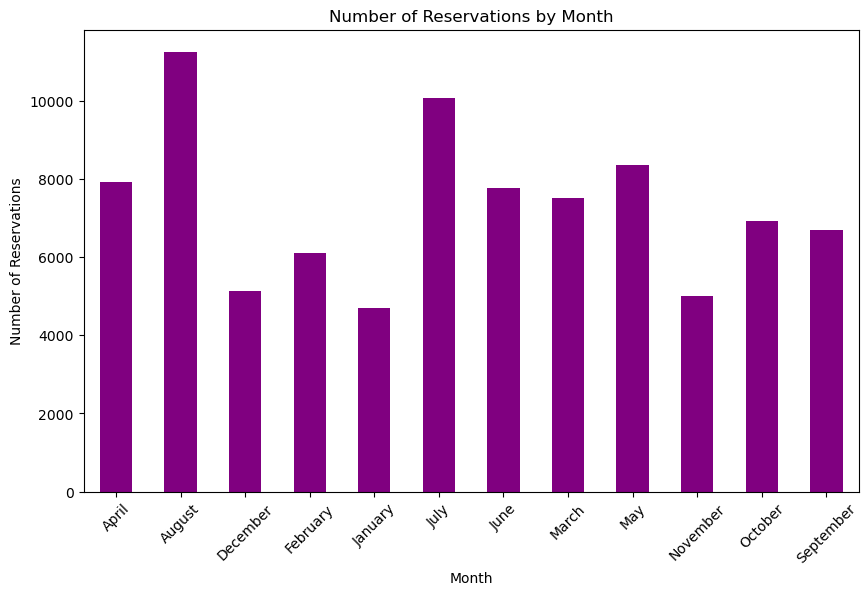

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count reservations by month
reservations_by_month = df2_selected['arrival_date_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
reservations_by_month.plot(kind='bar', color='purple')
plt.title('Number of Reservations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.show()   #(Mckinney, 2023, CH 9.2)

**Explanation for the Visualization:**
This visualization is performed to analyze the distribution of hotel reservations across different months. By counting the number of reservations for each month and visualizing them using a bar chart, we can quickly identify patterns or trends in the booking behavior. This information can be valuable for understanding seasonality, such as peak months for reservations or periods with lower demand. Hotel managers can use this insight for resource planning, marketing strategies, and demand forecasting.

**Reservation Density by Month and Number of Adults**

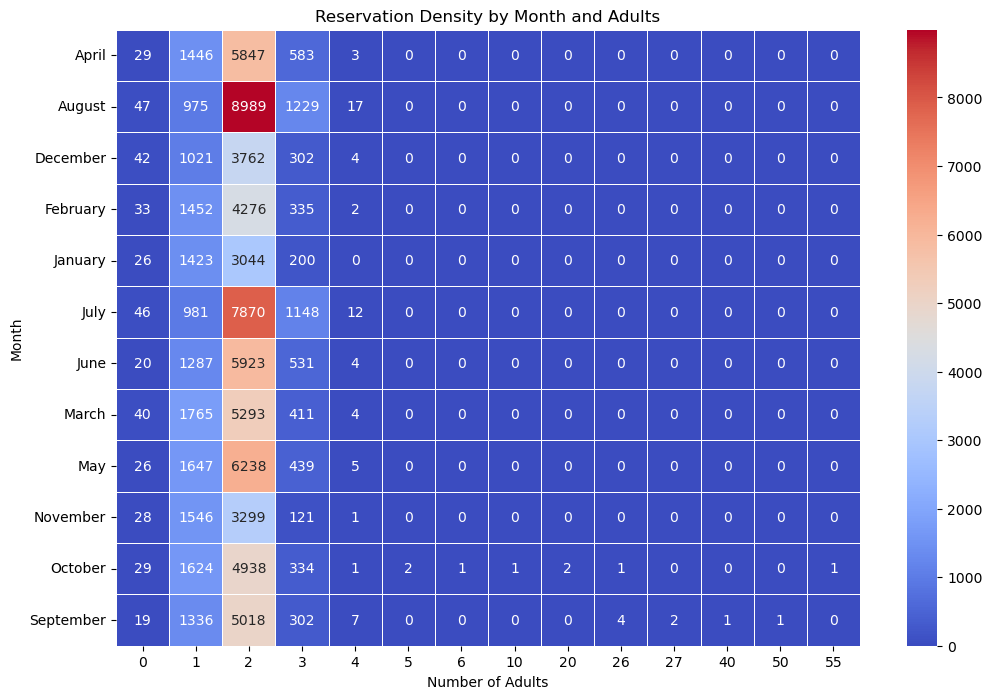

In [51]:
# Create pivot table
heatmap_data = df2_selected.groupby(['arrival_date_month', 'adults']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=.5) #(Yim et al., Ch. Visualizing multivariate data with a heatmap, 2018)
plt.title('Reservation Density by Month and Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Month')
plt.show() 

**Explanation for the Visualization:**
This heatmap shows the density of hotel reservations based on the number of adults in a booking and the month of arrival. Each cell in the heatmap represents the count of reservations for a specific combination of month and number of adults.
The purpose of this visualization is to explore patterns in guest behavior, such as which months see more bookings with certain group sizes. It provides a detailed view of how group size correlates with seasonality. This can be useful for tailoring promotional campaigns, pricing strategies, and resource allocation to cater to varying group sizes during different times of the year.

**Monthly Trends in Hotel Reservations**

/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/522943760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_selected['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)


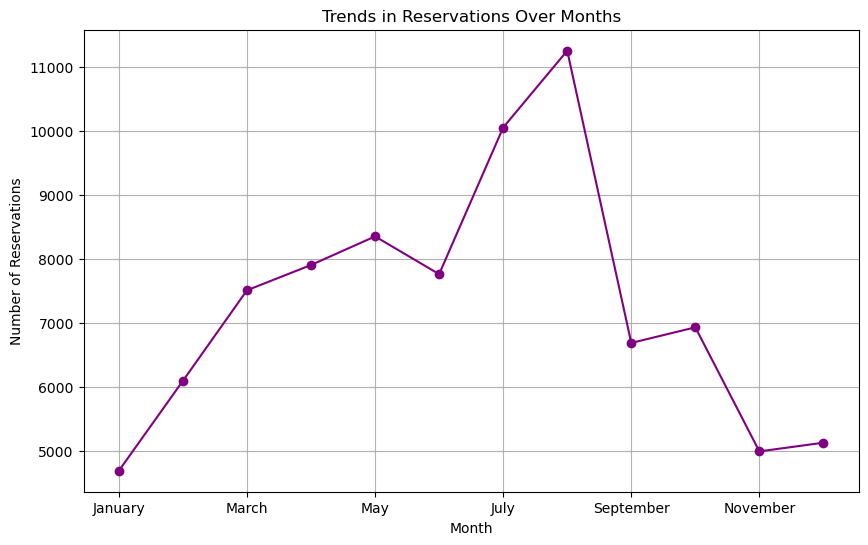

In [53]:
# Ensure the months are ordered chronologically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df2_selected['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Count reservations by month
trend_data = df2_selected['arrival_date_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o', color='purple')
plt.title('Trends in Reservations Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.grid(True)
plt.show()

**Explanation for the Visualization:**
This line chart visualizes the trend in hotel reservations over the course of a year, with months ordered chronologically. By plotting the number of reservations for each month, this visualization highlights seasonal fluctuations, making it easy to observe peak and low-demand periods. The inclusion of markers and a grid enhances readability and aids in pinpointing exact data points.
This analysis is particularly valuable for identifying recurring patterns in customer behavior across the year. It can inform decisions such as staffing, inventory planning, and seasonal pricing strategies to optimize operational efficiency and revenue.

**Monthly Average Room Prices**

/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/2439283259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_selected['arrival_date_month'] = pd.Categorical(
/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/2439283259.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/2439283259.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


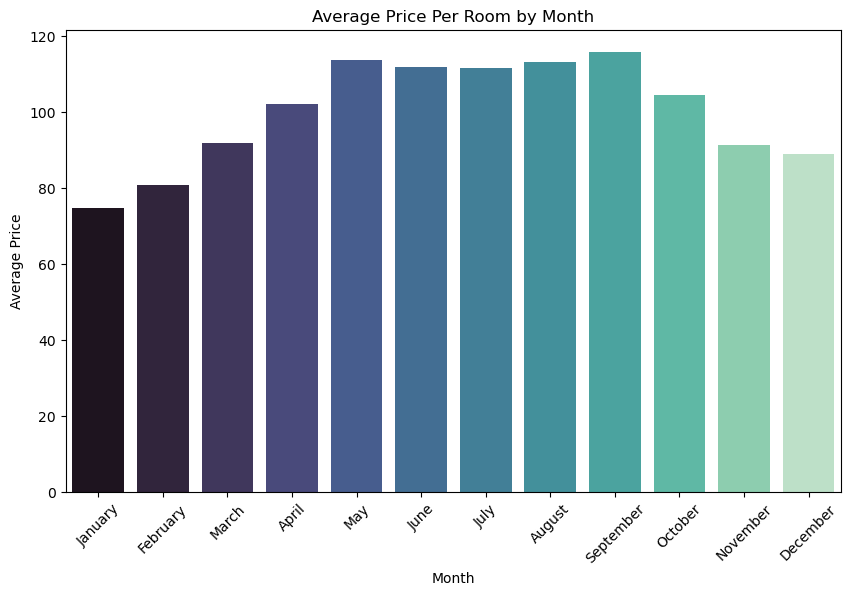

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure months are ordered chronologically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Update the 'arrival_date_month' column in df3_selected with categorical ordering
df3_selected['arrival_date_month'] = pd.Categorical(
    df3_selected['arrival_date_month'], categories=month_order, ordered=True
)

# Plot the visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='arrival_date_month', 
    y='avg_price_per_room', 
    data=df3_selected, 
    ci=None, 
    palette='mako'
)
plt.title('Average Price Per Room by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

**Explanation for the Visualization:** 
This bar plot displays the average price per room for each month, with the months ordered chronologically. By using the sns.barplot function, it provides a clear and visually appealing representation of the variation in room pricing throughout the year.
The purpose of this visualization is to identify trends in pricing, such as which months have higher or lower average room rates. This can be attributed to seasonal demand, holidays, or special events. Hotel management can leverage this information to optimize revenue through dynamic pricing strategies, promotional offers, and targeted marketing efforts during specific periods.


**Monthly Average Room Prices for New vs. Repeated Guests**

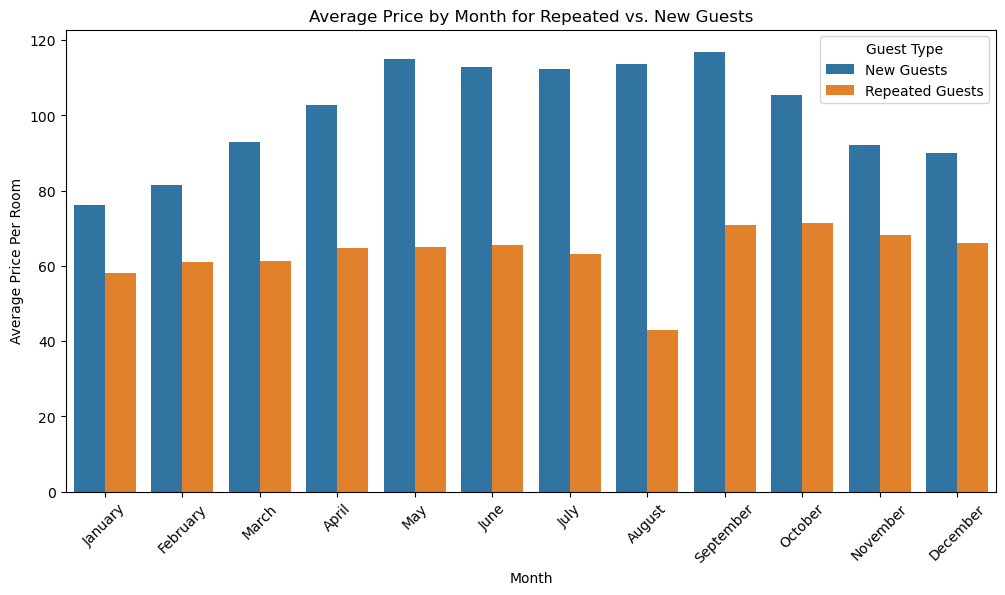

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='arrival_date_month', 
    y='avg_price_per_room', 
    hue='repeated_guest', 
    data=df3_selected, 
    errorbar=None, 
    palette='tab10'
)
plt.title('Average Price by Month for Repeated vs. New Guests')
plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.legend(['New Guests', 'Repeated Guests'], title='Guest Type')
plt.xticks(rotation=45)
plt.show()

**Explanation for the Visualization:**
This grouped bar plot illustrates the average price per room for each month, comparing new guests and repeated guests. The hue='repeated_guest' parameter segregates the data into two categories, enabling a side-by-side comparison within each month.
The visualization aims to uncover differences in pricing trends between the two guest types. For instance, it may reveal whether repeated guests consistently pay less due to loyalty discounts or if their booking patterns differ seasonally. This analysis can help hotels evaluate the effectiveness of loyalty programs and adjust pricing strategies to balance guest retention with revenue optimization.

**Average Room Price by Month and Market Segment**

/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/4178189752.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df3_selected.pivot_table(


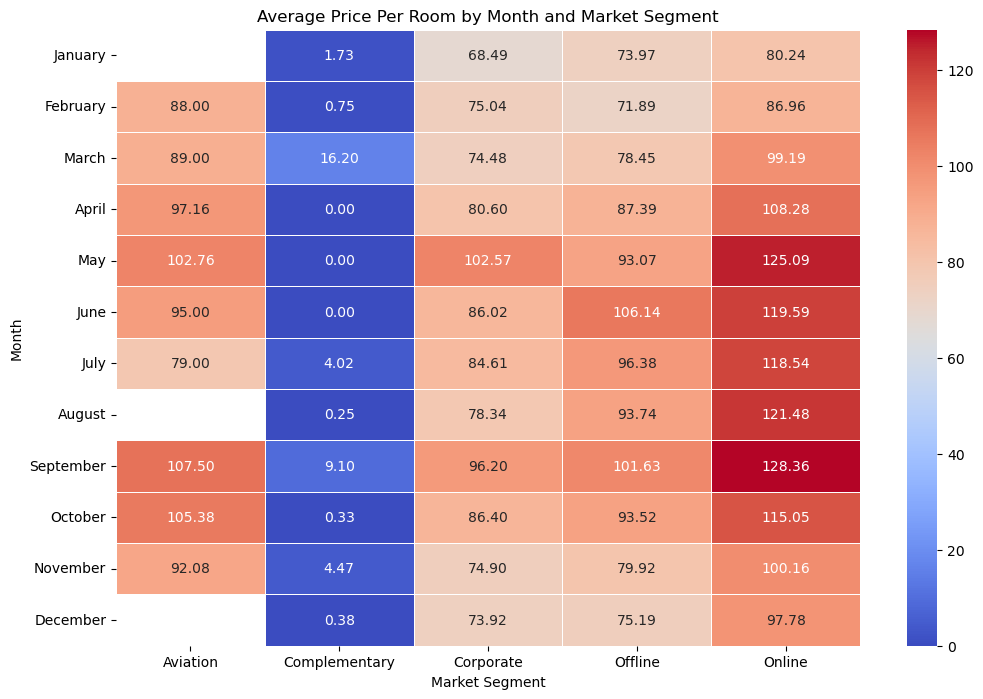

In [59]:
# Create pivot table
heatmap_data = df3_selected.pivot_table(
    index='arrival_date_month', 
    columns='market_segment_type', 
    values='avg_price_per_room', 
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5) #(Yim et al., Ch. Visualizing multivariate data with a heatmap, 2018)
plt.title('Average Price Per Room by Month and Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Month')
plt.show()

**Explanation for the Visualization:**
This heatmap visualizes the average price per room across different months and market segments. Each cell represents the mean room price for a specific month and market segment combination. The color gradient emphasizes the variation in pricing, with darker or lighter shades indicating higher or lower averages.
The purpose of this visualization is to understand how pricing strategies vary by market segment (e.g., corporate, leisure, or group bookings) throughout the year. This insight can help hotels tailor their pricing strategies to specific customer groups, align with seasonal demand trends, and optimize revenue by targeting high-value market segments during peak periods.


**Average daily rate(ADR) by Market Segment,Month and Hotel Type**

/var/folders/hz/nvxn99bs2519dw74wfm362x80000gn/T/ipykernel_18328/374442060.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_json1.groupby(['market_segment', 'arrival_date_month', 'hotel'])['adr'].mean().reset_index()


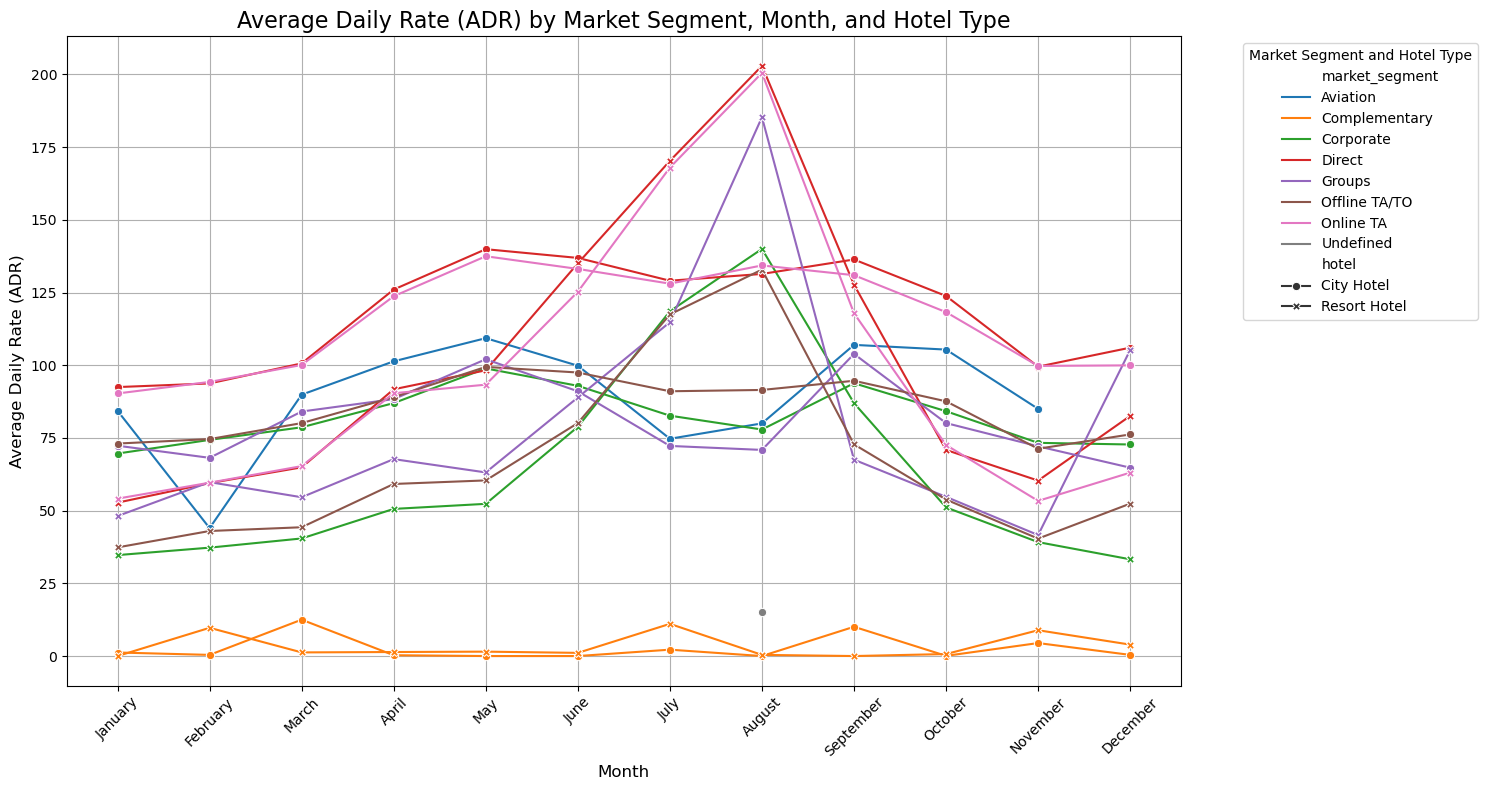

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `arrival_date_month` is ordered chronologically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert the 'arrival_date_month' column to categorical for correct ordering
df_json1['arrival_date_month'] = pd.Categorical(
    df_json1['arrival_date_month'], categories=month_order, ordered=True
)

# Group the data to get the mean ADR by market segment, month, and hotel type
grouped_data = df_json1.groupby(['market_segment', 'arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=grouped_data,
    x='arrival_date_month',
    y='adr',
    hue='market_segment',
    style='hotel',
    markers=True,
    dashes=False,
    palette='tab10'
)

# Add titles and labels
plt.title('Average Daily Rate (ADR) by Market Segment, Month, and Hotel Type', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Market Segment and Hotel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show() #Aldrin Yim, Claire Chung and Allen Yu (2018) Matplotlib for Python Developers. 2nd edn. Packt Publishing


**Explaination for the Visualisation:** This code visualizes the Average Daily Rate (ADR) by month, market segment, and hotel type using Seaborn's lineplot. It ensures months are displayed in chronological order, calculates mean ADR grouped by market segment and hotel type, and plots distinct lines for each segment with markers for better readability. Customizations like titles, axis labels, and legends enhance clarity, while the grid and tight layout improve aesthetics. This visualization highlights seasonal ADR trends, segment-wise performance, and differences between resort and city hotels, providing actionable insights for pricing and revenue strategies.

**Conclusion:** \
This analysis provided valuable insights into the seasonal trends, pricing patterns, and guest behaviors related to hotel reservations. By visualizing data through various techniques, such as bar plots and heatmaps, we identified key trends in room pricing and booking density across months, guest types, and market segments. These findings have practical implications, such as optimizing pricing strategies, tailoring promotional efforts, and better managing resources to align with seasonal demand fluctuations.

**Findings:** \
I have learned that the hotel bookings dataset had missing data is present in columns like children, country, agent, and company, with company having substantial gaps (only 6,797 entries filled).After removing the duplicates and handling missing values I performed data analysis where the main task was to merge the two csv flies which is the hotel_booking.csv and hotel reservation.csv where the main problem was that they did not have same columns so i worked on the hotel reservations csv to change the two columns i.e the arrival_date_column and adults column and made them according to the hotel bookings csv so that I can merge them. After successfully completing data analysis I moved on to data visualisation and performed different visualisations so that we can visually see and point out the aspects which affect the hotel industry more.

**Limitations:** \
I could have improved my project by using better ways to fill missing data, like predicting the missing values using similar data. By creating new features, like showing the seasonality of bookings, I could have learned more. Using better charts with libraries like Matplotlib or Seaborn would have helped show trends more clearly. I also could have checked how different factors are related, grouped the data for easier insights, and looked at time trends to spot patterns. Finally, testing my results with different data splits could have made my analysis more reliable.

**References:** \
1)Reppel, A. and colleagues (2024) MN5813: Module Handbook. MSc Business Analytics. Version 1.5. 26 December.\
2)Antonio, N., de Almeida, A., & Nunes, L. (2019). Hotel booking demand datasets. Data in Brief, 22, 41-49. https://doi.org/10.1016/j.dib.2018.11.126\
3)McKinney, J. (2023). Title of the Book: Subtitle if applicable (Edition, Chapter 9.2). Publisher.\
4)Yim, E., Author2, A., Author3, B., & Author4, C. (2018). Visualizing multivariate data with a heatmap. In Title of the Book or Journal (pp. [page numbers of the chapter]).\
5)Aldrin Yim, Claire Chung and Allen Yu (2018) Matplotlib for Python Developers. 2nd edn. Packt Publishing. Available at: https://learning.oreilly.com/library/view/matplotlib-for-python/9781788625173/?ar= (Accessed: January 13, 2025).\
6)Stack Overflow (2022) Merging 2 datasets in Python. Available at: https://stackoverflow.com/questions/74834625/merging-2-datasets-in-python (Accessed: 02 January 2025).

**Link for repository:** \
https://github.com/VaishnaviJ2000/MN5813_2500370